In [8]:
### Collapse of an Homogeneous Sphere - Initial Conditions code for 'treecode' ### 

In [9]:
## Section 1 - Creation of the initial condition file ## 

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Definition of the parameters of the system (in internal units)
Nparticles = 1000
Ndimensions = 3
time = 0   # initial time simulation
radius = 1 # radius of the homogeneous sphere 
M = 100    # total mass of the system
m = M/Nparticles # mass of each particle (equal mass particles)
density = M/(4/3*math.pi*radius**3) # mass density of the sphere

## Initial positions setting
def positions(a):  
    # position of the particle in spherical coordinates
    k = np.random.random() # generation of a random number uniformly distributed in [0,1)
    R = a*(k**(1/3))
    k = np.random.random()
    t = math.acos(1-(2*k))
    k = np.random.random()
    f = 2*(math.pi)*k 
    # position of the particle in cartesian coordinates
    x = R*(math.sin(t))*(math.cos(f))
    y = R*(math.sin(t))*(math.sin(f))
    z = R*(math.cos(t))
    return x,y,z

# creation and filling of the position arrays
x = np.empty(Nparticles)
y = np.empty(Nparticles)
z = np.empty(Nparticles)
for i in range(Nparticles):
    a,b,c = positions(radius)
    x[i] = a
    y[i] = b
    z[i] = c
        
## Initial velocities setting (for hypothesis, particles' velocity=0)
vx = np.zeros(Nparticles)
vy = np.zeros(Nparticles)
vz = np.zeros(Nparticles)

## Saving the initial conditions in 'initial_conditions_file.txt' that then will be runned by the c++ code
with open('initial_conditions_file.txt','w') as file:
    file.write("{}\n{}\n{}\n".format(Nparticles,Ndimensions,time))
    for i in range(Nparticles):
        file.write("{}\n".format(m))
    for i in range(Nparticles):
        file.write("{:25.15e}{:25.15e}{:25.15e}\n".format(x[i],y[i],z[i]))
    for i in range(Nparticles):
        file.write("{:25.15e}{:25.15e}{:25.15e}\n".format(vx[i],vy[i],vz[i]))
        
## Saving some system properties that are used in the analysis code       
with open('system_properties.txt','w') as file:
    file.write("{}\n{}\n{}".format(Nparticles,M,radius)) 

In [25]:
## Section 2 - Plot of the initial positions of the particles ##

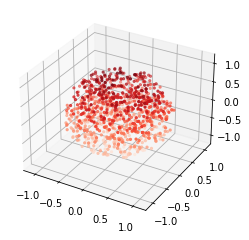

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-radius-0.2, radius+0.2)
ax.set_ylim3d(-radius-0.2, radius+0.2)
ax.set_zlim3d(-radius-0.2, radius+0.2)
ax.scatter3D(x,y,z,c=z,cmap='Reds',marker='.')

In [27]:
## Section 3 - Instruction to compile the code from the 'treecode' from the terminal and hints to set the parameters ##

In [28]:
# When you have runned 'Section 1', your system initial conditions will be saved in 'initial_conditions_file.txt';
# than, before running the 'Collapse of an Homogeneous Sphere - Analysis code for 'treecode', you need to run from 
# the terminal the c++ executable file. You can write (for example):
#
#   ./treecode in=initial_conditions_file.txt out=output_data.txt dtime=0.000111 eps=3e-02 theta=0.1 options=out-phi tstop=0.333 dtout=0.000222 > system_description.txt
#
# All the parameters are expressed in internal units; it's useful to compute the free fall time of the sphere:

t_collapse = math.sqrt( (3*math.pi)/(32*density))

# Here you can find the description of some of the parameters passed through the terminal (see for more details
# the documentation of the 'Barnes tree code' - http://www.ifa.hawaii.edu/faculty/barnes/treecode/treeguide.html):
# 
# - dtime: it is the integration time step. Set it not too big and too small; for example choose dtime=t_collapse/(10^a)
#  It's convenient to use a timestep which has an exact representation as a floating-point number

t_collapse = math.sqrt( (3*math.pi)/(32*density))
dtime = t_collapse/(10**3)

# - eps: it is the smoothing length used in the gravitational force calculation.
#  Choose a value that is a fraction of the typical separation between particles: 10^(-b)*(Vol/Nparticles)**(1/3)

separation = ((4/3*math.pi*radius**3)/Nparticles)**(1/3)
eps = 10**(-1)*separation

# - theta: it is the opening angle used to adjust the accuracy of the force calculation. 
#  Values less than unity produce more accurate forces, albeit at greater computational expense.

theta = 0.1

# - options=out-phi: it saves in the output_data.txt also the potential energy

# - tstop: it is the time at which the N-Body integration terminates. Set it, for example, as tstop=2*t_collapse

tstop = 2*t_collapse

# - dtout: it is the time interval between output files. To insure that outputs are performed when expected, dtout
# should be a multiple of dtime. 

dtout = dtime*2




In [29]:
print("The sphere collapses in:", t_collapse, " internal units time")
print('\ndtime: ',dtime)
print('\nMean separation: ',separation,'    eps: ',eps)
print('\ntheta: ', theta)
print('\ntstop: ', tstop)
print('\ndtout: ', dtout)

The sphere collapses in: 0.11107207345395916  internal units time

dtime:  0.00011107207345395915

Mean separation:  0.16119919540164698     eps:  0.016119919540164698

theta:  0.1

tstop:  0.2221441469079183

dtout:  0.0002221441469079183
